In [12]:
#import packages
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes =True)
import geopandas as gpd
from geopandas import GeoDataFrame
from geopy.geocoders import ArcGIS
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [25]:
df=pd.read_csv('//Users/gregorygibbs/Downloads/mental_final.csv')
df_sorted = df.sort_values(by='YearEnd')
df_sorted

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
671,2011,2011,DE,Delaware,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Age-adjusted Mean,2.7,...,3.3,Race/Ethnicity,"Black, non-Hispanic",POINT (-75.57774116799965 39.008830667000495),10,MTH,MTH1_0,AGEADJMEAN,RACE,BLK
352,2011,2011,CA,California,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Age-adjusted Mean,3.7,...,3.9,Overall,Overall,POINT (-120.99999953799971 37.63864012300047),6,MTH,MTH1_0,AGEADJMEAN,OVERALL,OVR
1940,2011,2011,MT,Montana,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Age-adjusted Mean,2.9,...,4.2,Race/Ethnicity,Hispanic,POINT (-109.42442064499971 47.06652897200047),30,MTH,MTH1_0,AGEADJMEAN,RACE,HIS
349,2011,2011,CO,Colorado,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Age-adjusted Mean,7.2,...,9.2,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-106.13361092099967 38.843840757000464),8,MTH,MTH1_0,AGEADJMEAN,RACE,MRC
3369,2011,2011,WA,Washington,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Age-adjusted Mean,2.6,...,3.2,Race/Ethnicity,"Other, non-Hispanic",POINT (-120.47001078999972 47.52227862900048),53,MTH,MTH1_0,AGEADJMEAN,RACE,OTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669,2020,2020,FL,Florida,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Age-adjusted Mean,3.7,...,4.9,Race/Ethnicity,"Other, non-Hispanic",POINT (-81.92896053899966 28.932040377000476),12,MTH,MTH1_0,AGEADJMEAN,RACE,OTH
3670,2020,2020,CA,California,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Age-adjusted Mean,4.3,...,5.4,Race/Ethnicity,"Black, non-Hispanic",POINT (-120.99999953799971 37.63864012300047),6,MTH,MTH1_0,AGEADJMEAN,RACE,BLK
3671,2020,2020,DC,District of Columbia,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Age-adjusted Mean,5.0,...,5.4,Overall,Overall,POINT (-77.036871 38.907192),11,MTH,MTH1_0,AGEADJMEAN,OVERALL,OVR
3651,2020,2020,AL,Alabama,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Age-adjusted Mean,5.0,...,7.2,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-86.63186076199969 32.84057112200048),1,MTH,MTH1_0,AGEADJMEAN,RACE,MRC


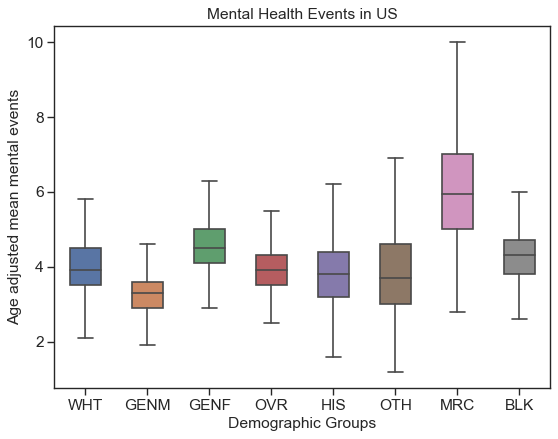

In [26]:
#create box plot for demographic groups
plt.figure(figsize=(8, 6), dpi=80)

sns.boxplot(x='StratificationID1', y='DataValue', data=df, showfliers=False, width=0.5)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Demographic Groups', fontsize=14)
plt.ylabel('Age adjusted mean mental events', fontsize=14)
plt.title('Mental Health Events in US', fontsize=14)
plt.savefig('boxplot.png', dpi=80, bbox_inches = 'tight');

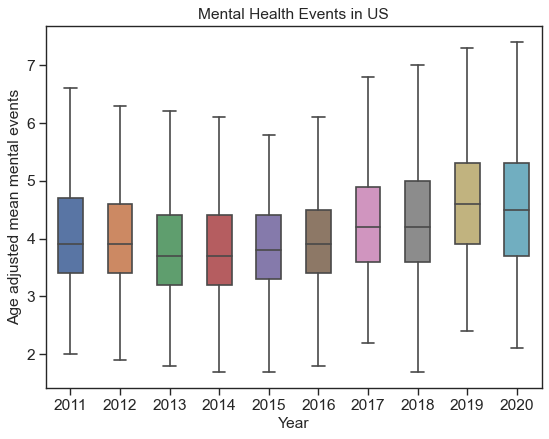

In [31]:
#create box plot for year
plt.figure(figsize=(8, 6), dpi=80)

sns.boxplot(x='YearEnd', y='DataValue', data=df_sorted, showfliers=False, width=0.5)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Age adjusted mean mental events', fontsize=14)
plt.title('Mental Health Events in US', fontsize=14)
plt.savefig('boxplot.png', dpi=80, bbox_inches = 'tight');

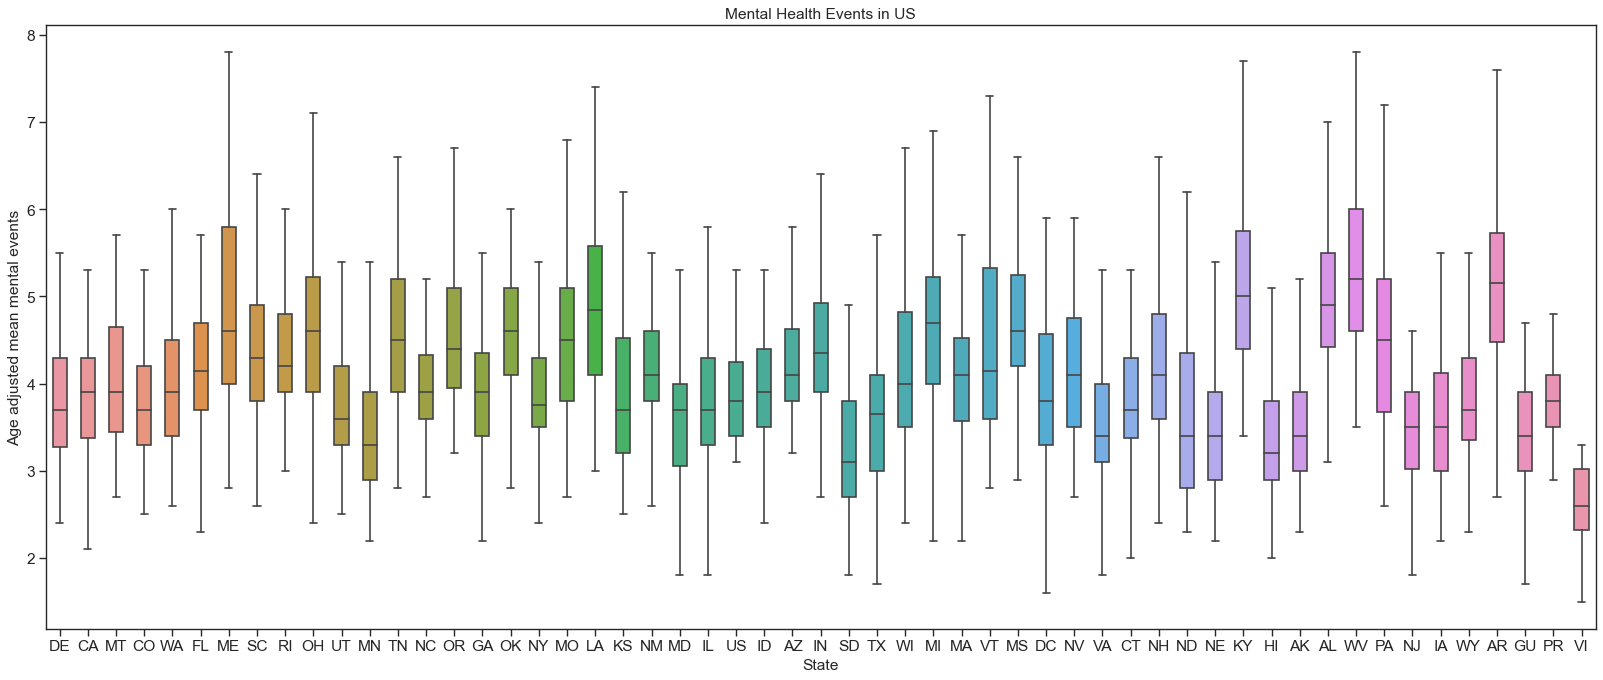

In [32]:
#create box plot for year
plt.figure(figsize=(25, 10), dpi=80)

sns.boxplot(x='LocationAbbr', y='DataValue', data=df_sorted, showfliers=False, width=0.5)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('State', fontsize=14)
plt.ylabel('Age adjusted mean mental events', fontsize=14)
plt.title('Mental Health Events in US', fontsize=14)
plt.savefig('boxplot.png', dpi=80, bbox_inches = 'tight');

In [37]:
#Create Choropeth

from dash import Dash, dcc,Output, Input             
import dash_bootstrap_components as dbc  
 
# Build  components
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
mytext = dcc.Markdown(children="")

# Customize Layout
app.layout = dbc.Container([mytext])

# Run app
if __name__=='__main__':
    app.run_server(port=8041)
app = Dash(__name__, external_stylesheets=[dbc.themes.LUX])
mytitle = dcc.Markdown(children='')
mygraph = dcc.Graph(figure={})
dropdown = dcc.Dropdown(options=df_sorted.columns.values[:],
                        value='Mental Health Events In US',  
                        clearable=False)

# Customize  Layout
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([mytitle], width=6)
    ], justify='center'),
    dbc.Row([
        dbc.Col([mygraph], width=12)
    ]),
    dbc.Row([
        dbc.Col([dropdown], width=6)
    ], justify='center'),

], fluid=True)

# Callback allows components to interact
@app.callback(
    Output(mygraph, 'figure'),
    Output(mytitle, 'children'),
    Input(dropdown, 'value')
)
def update_graph(column_name):  

# function arguments come from the component property of the Input

    print('DataValue')
    print(type('DataValue'))
    # https://plotly.com/python/choropleth-maps/
    fig = px.choropleth(data_frame=df,
                        locations='LocationAbbr',
                        locationmode="USA-states",
                        scope="usa",
                        height=600,
                        color='DataValue',
                        animation_frame='YearStart')

    return fig, '# '+column_name # returned objects are assigned to the component property of the Output


# Run app
if __name__=='__main__':
    app.run_server(debug=True, port=8054)

DataValue
<class 'str'>
DataValue
<class 'str'>
